In [1]:
import warnings
import pandas as pd
import datetime
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,}'.format
print(f'Last Generated at {datetime.datetime.now()}')
from IPython.core.display import HTML,display,Image
display(HTML('<a href="http://www.cov2response.com"> Back to cov2response.com </a>'))

Last Generated at 2020-06-13 10:57:49.072928


In [2]:
import pandas as pd 
pd.options.display.float_format = '{:,}'.format


df=pd.read_csv('./time_series_covid19_confirmed_global.csv')
#df=pd.read_csv('./time_series_covid19_deaths_global.csv') 
del df['Long']
del df['Lat']
del df['Province/State']
mydata=df[df['Country/Region']=='US'].T.iloc[1:,:]
import numpy as np
mydata.columns=['confirmed']
mydata['dt']=mydata.index
mydata['log_confirmed']=np.log(mydata['confirmed'].values.astype(float)+1)
mydata['day'] = np.arange(len(mydata))+1
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * x + c
x = mydata.day[-7:]   # changed boundary conditions to avoid division by 0
yn = mydata.log_confirmed[-7:]
#yn = y + 0.2*np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x, yn)
gx=pd.DataFrame(pd.date_range(start='01/22/2020', end='07/7/2020'),columns=['dt'])
gx['day']=np.arange(len(gx))+1
gx['predicted']=np.exp(func(gx.day, *popt))
import datetime
start= pd.to_datetime(pd.to_datetime("today").date()) - pd.Timedelta(14, unit='D')
end=pd.to_datetime(pd.to_datetime("today").date()) + pd.Timedelta(14, unit='D')
newdt=gx[ ( gx.dt > start)  & (gx.dt < end)  ]
f=pd.merge(newdt,mydata,right_on='day',left_on='day',how='left')
import matplotlib.pyplot as plt 
fig1=plt.figure(figsize=(20,6))
plt.plot(f.dt_x,f.predicted,label='Predicted Cases',linewidth=2)
plt.plot(f.dt_x,f.confirmed,label='Confirmed Cases',linewidth=6)
gg=pd.DataFrame()
gg['dt']=f.dt_x
gg['predicted']=np.round(f.predicted)
gg['confirmed']=f.confirmed
gg['error_percentage']=100*(f.predicted-f.confirmed)/f.confirmed
gg.fillna(0,inplace=True)
plt.grid()
plt.legend()
plt.title('US - Confirmed Cases',fontsize=20)
#plt.show()
gg['error_percentage']=np.round(gg['error_percentage'])
gg.columns=['date', 'prediction', 'actual', 'error_percentage']
#print('Forecast Table for USA - Total Confirmed Cases ')
tab1=gg[10:].copy()

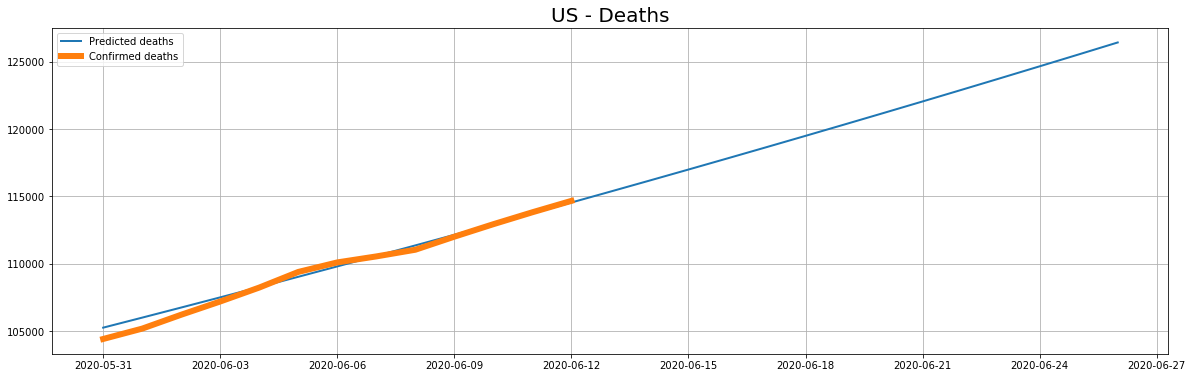

,date,confirmed_cases_prediction,confirmed_cases_actual,error_perc_cases,deaths_prediction,deaths_actual,error_perc_death
0,2020-06-10,"2,003,430.0",2000702,0.0,"112,944.0",112938,0.0
1,2020-06-11,"2,023,993.0",2023590,0.0,"113,743.0",113823,-0.0
2,2020-06-12,"2,044,766.0",2048986,-0.0,"114,547.0",114669,-0.0
3,2020-06-13,"2,065,753.0",0,0.0,"115,357.0",0,0.0
4,2020-06-14,"2,086,955.0",0,0.0,"116,173.0",0,0.0
5,2020-06-15,"2,108,375.0",0,0.0,"116,995.0",0,0.0
6,2020-06-16,"2,130,015.0",0,0.0,"117,822.0",0,0.0
7,2020-06-17,"2,151,877.0",0,0.0,"118,655.0",0,0.0
8,2020-06-18,"2,173,963.0",0,0.0,"119,494.0",0,0.0
9,2020-06-19,"2,196,276.0",0,0.0,"120,339.0",0,0.0


In [15]:
import pandas as pd 
#df=pd.read_csv('./time_series_covid19_confirmed_global.csv')
pd.options.display.float_format = '{:,}'.format

df=pd.read_csv('./time_series_covid19_deaths_global.csv') 
del df['Long']
del df['Lat']
del df['Province/State']
mydata=df[df['Country/Region']=='US'].T.iloc[1:,:]
import numpy as np
mydata.columns=['confirmed']
mydata['dt']=mydata.index
mydata['log_confirmed']=np.log(mydata['confirmed'].values.astype(float)+1)
mydata['day'] = np.arange(len(mydata))+1
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * x + c
x = mydata.day[-7:]   # changed boundary conditions to avoid division by 0
yn = mydata.log_confirmed[-7:]
#yn = y + 0.2*np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x, yn)
gx=pd.DataFrame(pd.date_range(start='01/22/2020', end='07/7/2020'),columns=['dt'])
gx['day']=np.arange(len(gx))+1
gx['predicted']=np.exp(func(gx.day, *popt))
import datetime
start= pd.to_datetime(pd.to_datetime("today").date()) - pd.Timedelta(14, unit='D')
end=pd.to_datetime(pd.to_datetime("today").date()) + pd.Timedelta(14, unit='D')
newdt=gx[ ( gx.dt > start)  & (gx.dt < end)  ]
f=pd.merge(newdt,mydata,right_on='day',left_on='day',how='left')
import matplotlib.pyplot as plt 
fig2=plt.figure(figsize=(20,6))
plt.plot(f.dt_x,f.predicted,label='Predicted deaths',linewidth=2)
plt.plot(f.dt_x,f.confirmed,label='Confirmed deaths',linewidth=6)
gg=pd.DataFrame()
gg['dt']=f.dt_x
gg['predicted']=np.round(f.predicted)
gg['confirmed']=f.confirmed
gg['error_percentage']=100*(f.predicted-f.confirmed)/f.confirmed
gg.fillna(0,inplace=True)
plt.grid()
plt.legend()
plt.title('US - Deaths',fontsize=20)
#plt.show()
gg['error_percentage']=np.round(gg['error_percentage'])
gg.columns=['date', 'prediction', 'actual', 'error_percentage']
#print('Forecast Table for US - Total Deaths')

tab2=gg[10:].copy()
plt.show()
tab1.columns=['date','confirmed_cases_prediction','confirmed_cases_actual','error_perc_cases']
tab2.columns=['date','deaths_prediction','deaths_actual','error_perc_death']
pd.merge(tab1,tab2,right_on='date',left_on='date')

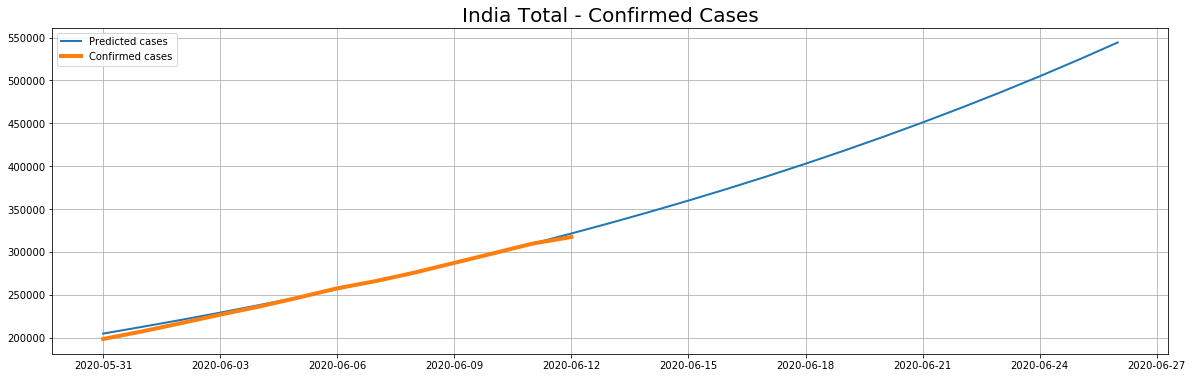

Forecast Table for Total/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,247015,"246,599.0",0.0,
6,2020-06-06,256483,"257,481.0",-0.0,
7,2020-06-07,266314,"266,017.0",0.0,
8,2020-06-08,276522,"275,998.0",0.0,
9,2020-06-09,287121,"287,154.0",-0.0,
10,2020-06-10,298127,"298,289.0",-0.0,
11,2020-06-11,309554,"309,595.0",-0.0,
12,2020-06-12,321419,"317,301.0",1.0,** Actuals may be incomplete for the day **
13,2020-06-13,333740,0.0,0.0,
14,2020-06-14,346532,0.0,0.0,


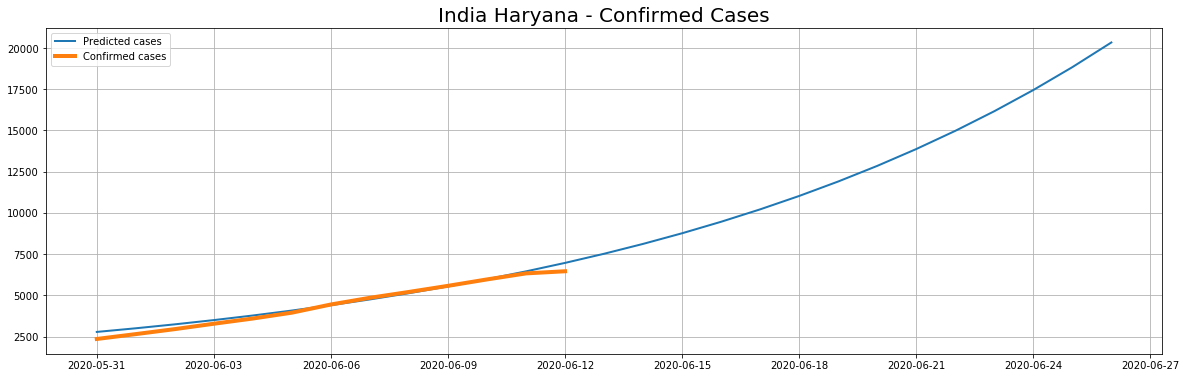

Forecast Table for Haryana/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,4080,"3,952.0",3.0,
6,2020-06-06,4405,"4,448.0",-1.0,
7,2020-06-07,4755,"4,854.0",-2.0,
8,2020-06-08,5133,"5,209.0",-1.0,
9,2020-06-09,5541,"5,579.0",-1.0,
10,2020-06-10,5981,"5,968.0",0.0,
11,2020-06-11,6457,"6,334.0",2.0,
12,2020-06-12,6970,"6,463.0",8.0,** Actuals may be incomplete for the day **
13,2020-06-13,7524,0.0,0.0,
14,2020-06-14,8122,0.0,0.0,


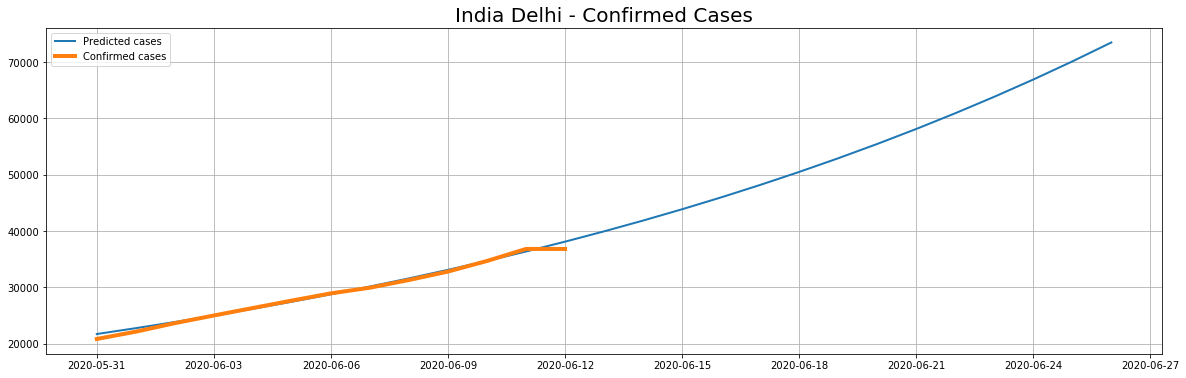

Forecast Table for Delhi/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,27451,"27,654.0",-1.0,
6,2020-06-06,28769,"28,936.0",-1.0,
7,2020-06-07,30150,"29,943.0",1.0,
8,2020-06-08,31597,"31,309.0",1.0,
9,2020-06-09,33115,"32,810.0",1.0,
10,2020-06-10,34704,"34,687.0",0.0,
11,2020-06-11,36371,"36,824.0",-1.0,
12,2020-06-12,38117,"36,824.0",4.0,** Actuals may be incomplete for the day **
13,2020-06-13,39947,0.0,0.0,
14,2020-06-14,41865,0.0,0.0,


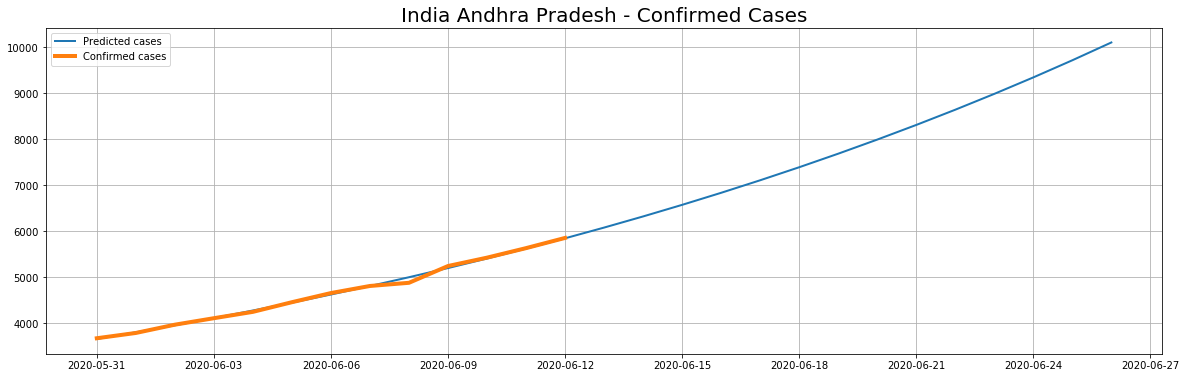

Forecast Table for Andhra Pradesh/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,4450,"4,460.0",-0.0,
6,2020-06-06,4627,"4,659.0",-1.0,
7,2020-06-07,4812,"4,813.0",-0.0,
8,2020-06-08,5003,"4,882.0",2.0,
9,2020-06-09,5203,"5,247.0",-1.0,
10,2020-06-10,5410,"5,429.0",-0.0,
11,2020-06-11,5626,"5,636.0",-0.0,
12,2020-06-12,5850,"5,858.0",-0.0,** Actuals may be incomplete for the day **
13,2020-06-13,6083,0.0,0.0,
14,2020-06-14,6325,0.0,0.0,


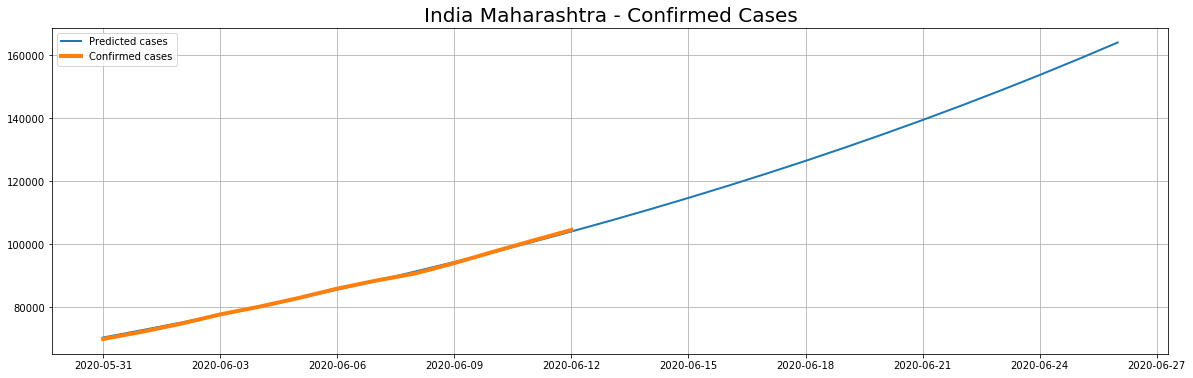

Forecast Table for Maharashtra/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,82908,"82,968.0",-0.0,
6,2020-06-06,85645,"85,975.0",-0.0,
7,2020-06-07,88471,"88,529.0",-0.0,
8,2020-06-08,91391,"90,787.0",1.0,
9,2020-06-09,94408,"94,041.0",0.0,
10,2020-06-10,97523,"97,648.0",-0.0,
11,2020-06-11,100742,"101,141.0",-0.0,
12,2020-06-12,104067,"104,568.0",-0.0,** Actuals may be incomplete for the day **
13,2020-06-13,107502,0.0,0.0,
14,2020-06-14,111050,0.0,0.0,


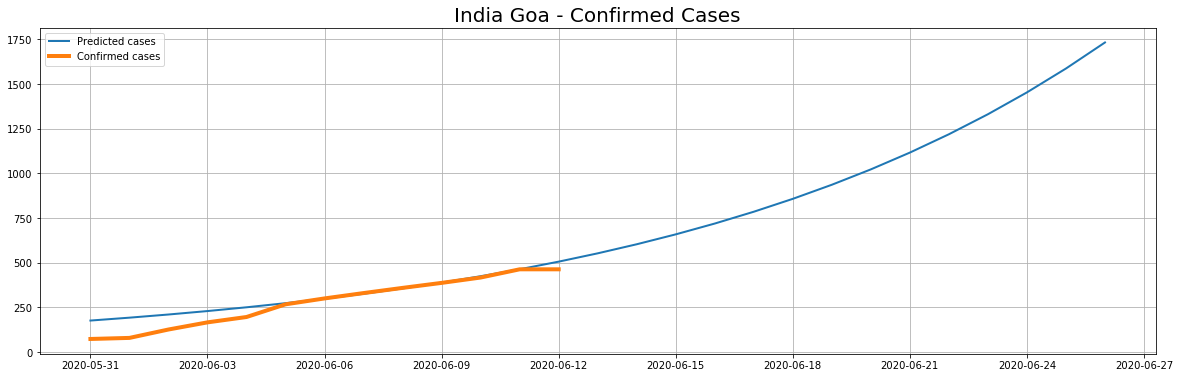

Forecast Table for Goa/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,273,267.0,2.0,
6,2020-06-06,299,300.0,-0.0,
7,2020-06-07,326,330.0,-1.0,
8,2020-06-08,356,359.0,-1.0,
9,2020-06-09,389,387.0,0.0,
10,2020-06-10,424,417.0,2.0,
11,2020-06-11,463,463.0,0.0,
12,2020-06-12,506,463.0,9.0,** Actuals may be incomplete for the day **
13,2020-06-13,552,0.0,0.0,
14,2020-06-14,603,0.0,0.0,


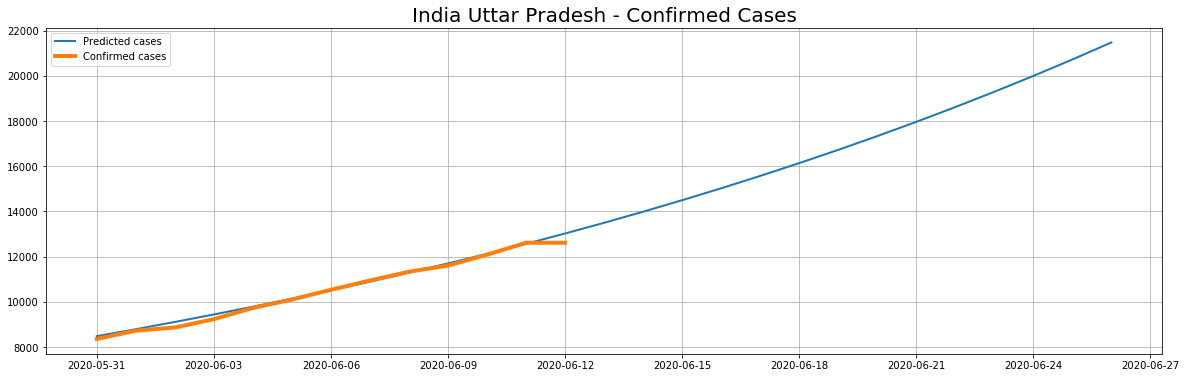

Forecast Table for Uttar Pradesh/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,10144,"10,103.0",0.0,
6,2020-06-06,10513,"10,536.0",-0.0,
7,2020-06-07,10895,"10,947.0",-0.0,
8,2020-06-08,11291,"11,335.0",-0.0,
9,2020-06-09,11702,"11,610.0",1.0,
10,2020-06-10,12127,"12,088.0",0.0,
11,2020-06-11,12568,"12,616.0",-0.0,
12,2020-06-12,13025,"12,616.0",3.0,** Actuals may be incomplete for the day **
13,2020-06-13,13499,0.0,0.0,
14,2020-06-14,13990,0.0,0.0,


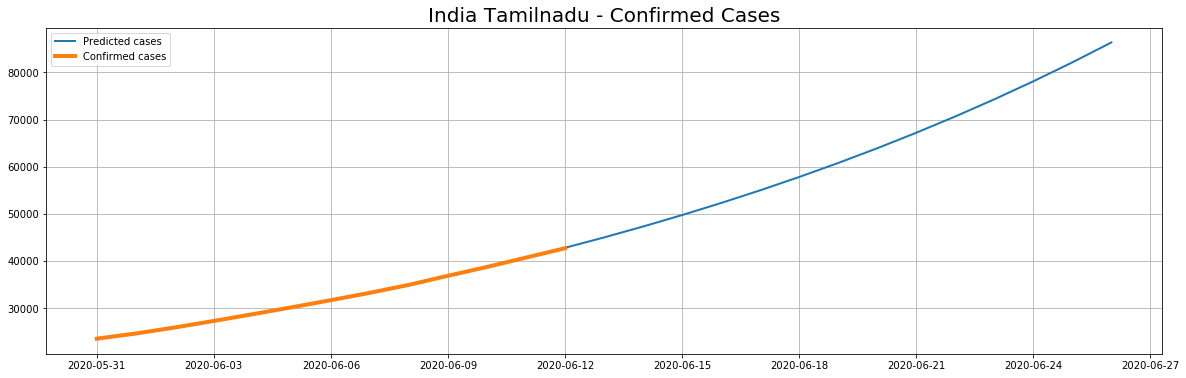

Forecast Table for Tamilnadu/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,30107,"30,152.0",-0.0,
6,2020-06-06,31657,"31,667.0",-0.0,
7,2020-06-07,33286,"33,229.0",0.0,
8,2020-06-08,34998,"34,914.0",0.0,
9,2020-06-09,36799,"36,841.0",-0.0,
10,2020-06-10,38693,"38,716.0",-0.0,
11,2020-06-11,40683,"40,698.0",-0.0,
12,2020-06-12,42777,"42,687.0",0.0,** Actuals may be incomplete for the day **
13,2020-06-13,44978,0.0,0.0,
14,2020-06-14,47292,0.0,0.0,


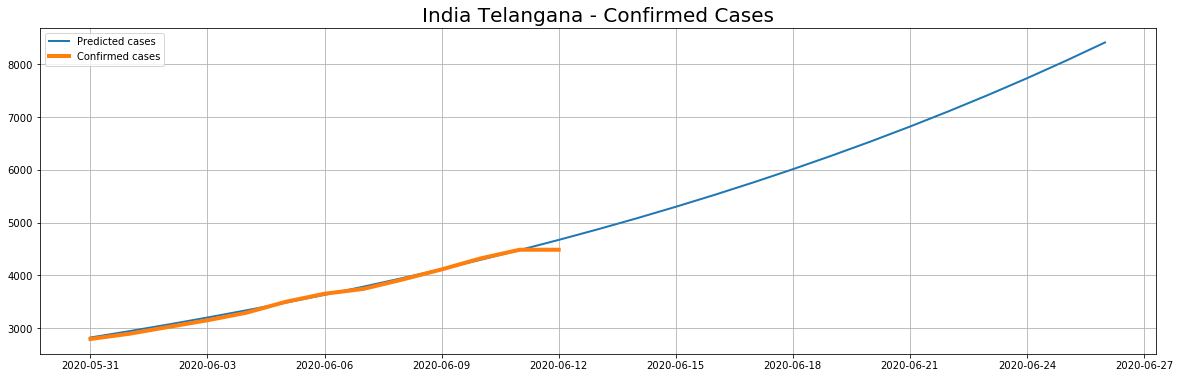

Forecast Table for Telangana/India - Total Confirmed Cases


,date,prediction,actual,error_percentage,comments
5,2020-06-05,3479,"3,496.0",-0.0,
6,2020-06-06,3629,"3,650.0",-1.0,
7,2020-06-07,3785,"3,742.0",1.0,
8,2020-06-08,3947,"3,920.0",1.0,
9,2020-06-09,4117,"4,111.0",0.0,
10,2020-06-10,4294,"4,320.0",-1.0,
11,2020-06-11,4478,"4,484.0",-0.0,
12,2020-06-12,4670,"4,484.0",4.0,** Actuals may be incomplete for the day **
13,2020-06-13,4871,0.0,0.0,
14,2020-06-14,5080,0.0,0.0,


In [16]:
import requests 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
df=pd.DataFrame(requests.get('https://api.covid19india.org/v3/min/timeseries.min.json').json())
df=df[df.index > '2020-05-01']
import numpy as np
for state in ['TT','HR','DL','AP','MH','GA','UP','TN','TG']:# df.columns:
    
    mydata=df.loc[:,[state]].copy()
    statemap={'HR':'Haryana','DL':'Delhi','AP':'Andhra Pradesh','MH':'Maharashtra',
    'GA':'Goa','UP':'Uttar Pradesh','TN':'Tamilnadu','TG':'Telangana','BH':'Bihar', 'TT':'Total'}
    state=statemap[state]
    mydata.columns=['confirmed']
    def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
        return a * x + c
    
    mydata['confirmed'] = mydata.confirmed.map (lambda x: x['total']['confirmed'])
    #print(mydata)
    mydata['dt']=pd.to_datetime(mydata.index)
    mydata['log_confirmed']=np.log(mydata['confirmed'].values.astype(float)+1)
    mydata['day'] = np.arange(len(mydata))+1
    x = mydata.day[-8:-1]   # changed boundary conditions to avoid division by 0
    yn = mydata.log_confirmed[-8:-1]
    #yn = y + 0.2*np.random.normal(size=len(x))
    popt, pcov = curve_fit(func, x, yn)
    gx=pd.DataFrame(pd.date_range(start='05/01/2020' , end='07/7/2020'),columns=['dt'])
    
    gx['day']=np.arange(len(gx))+1
    gx['predicted']=np.exp(func(gx.day, *popt))
    
    import datetime
    start= pd.to_datetime(pd.to_datetime("today").date()) - pd.Timedelta(14, unit='D')
    end=pd.to_datetime(pd.to_datetime("today").date()) + pd.Timedelta(14, unit='D')
    newdt=gx[ ( gx.dt > start)  & (gx.dt < end)  ]
    f=pd.merge(newdt,mydata,right_on='day',left_on='day',how='left')
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(20,6))
    plt.plot(f.dt_x,f.predicted,label='Predicted cases',linewidth=2)
    plt.plot(f.dt_x,f.confirmed,label='Confirmed cases',linewidth=4)
    gg=pd.DataFrame()
    gg['dt']=f.dt_x
    gg['predicted']=np.round(f.predicted).astype(int)
    gg['confirmed']=f.confirmed
    gg['error_percentage']=100*(f.predicted-f.confirmed)/f.confirmed
    gg.fillna(0,inplace=True)
    plt.grid()
    plt.legend()
    plt.title(f'India {state} - Confirmed Cases',fontsize=20)
    plt.show()
    gg['error_percentage']=np.round(gg['error_percentage'])
    gg.columns=['date', 'prediction', 'actual', 'error_percentage']
    gg['comments']=''
    gg.at[gg[gg.actual!=0].index.max(),'comments']='** Actuals may be incomplete for the day **'
    print(f'Forecast Table for {state}/India - Total Confirmed Cases')
    display(HTML(gg[5:].to_html()))
    del func
    del gx
    del gg


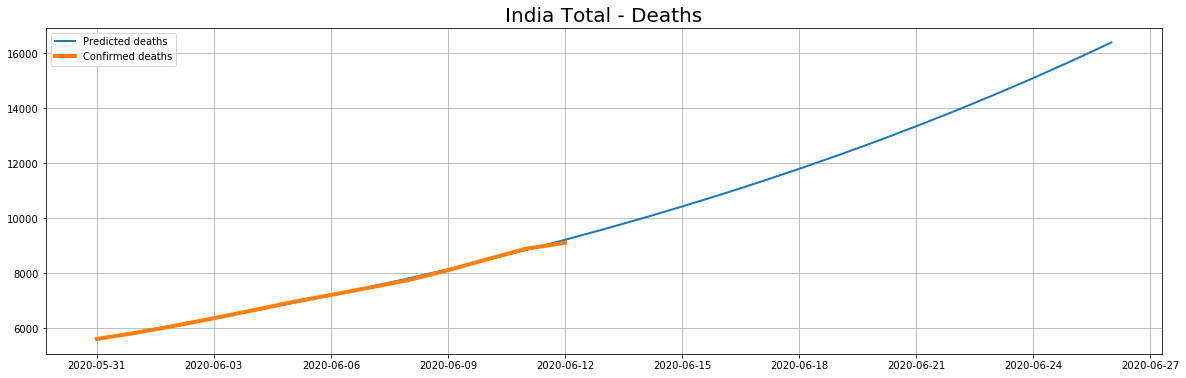

Forecast Table for Total/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,6907,"6,946.0",-1.0,
6,2020-06-06,7197,"7,207.0",-0.0,
7,2020-06-07,7500,"7,478.0",0.0,
8,2020-06-08,7814,"7,750.0",1.0,
9,2020-06-09,8143,"8,108.0",0.0,
10,2020-06-10,8484,"8,502.0",-0.0,
11,2020-06-11,8841,"8,890.0",-1.0,
12,2020-06-12,9212,"9,101.0",1.0,** Actuals may be incomplete for the day **
13,2020-06-13,9599,0.0,0.0,
14,2020-06-14,10001,0.0,0.0,


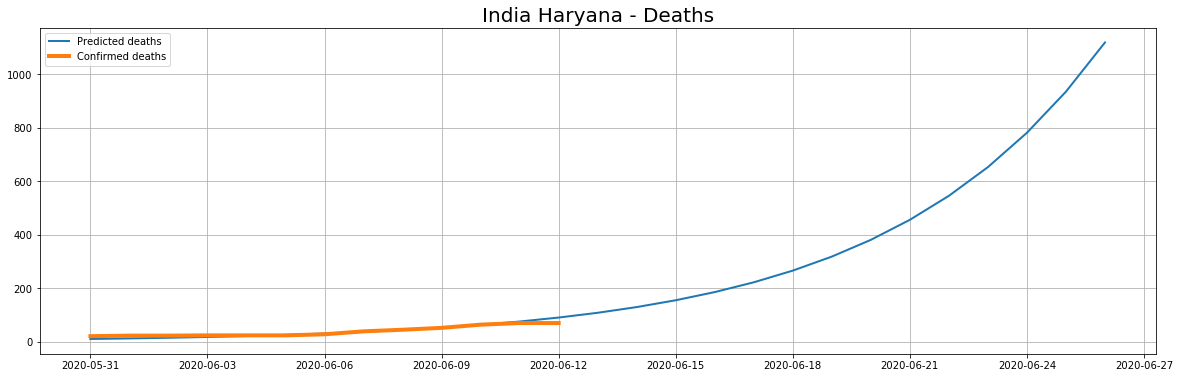

Forecast Table for Haryana/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,26,24.0,7.0,
6,2020-06-06,31,28.0,10.0,
7,2020-06-07,37,39.0,-5.0,
8,2020-06-08,44,45.0,-2.0,
9,2020-06-09,53,52.0,2.0,
10,2020-06-10,63,64.0,-1.0,
11,2020-06-11,76,70.0,8.0,
12,2020-06-12,91,70.0,29.0,** Actuals may be incomplete for the day **
13,2020-06-13,108,0.0,0.0,
14,2020-06-14,130,0.0,0.0,


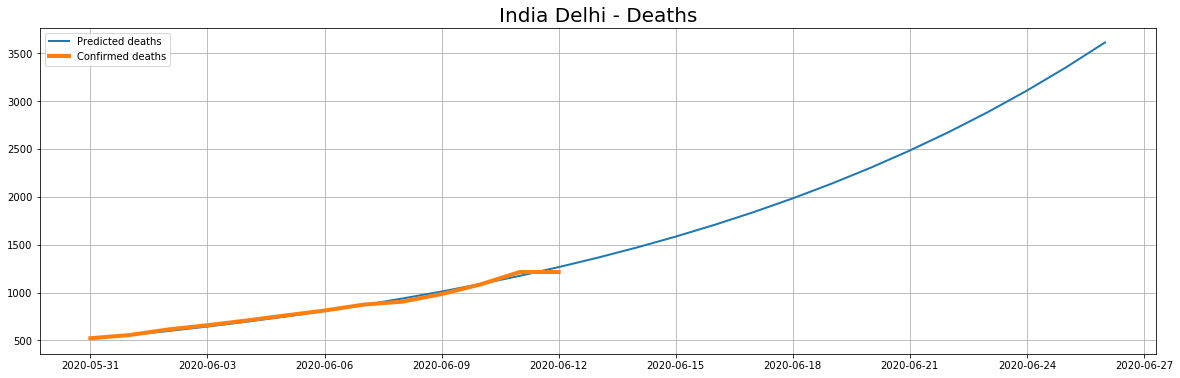

Forecast Table for Delhi/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,749,761.0,-2.0,
6,2020-06-06,807,812.0,-1.0,
7,2020-06-07,870,874.0,-0.0,
8,2020-06-08,938,905.0,4.0,
9,2020-06-09,1011,984.0,3.0,
10,2020-06-10,1089,"1,085.0",0.0,
11,2020-06-11,1174,"1,214.0",-3.0,
12,2020-06-12,1265,"1,214.0",4.0,** Actuals may be incomplete for the day **
13,2020-06-13,1364,0.0,0.0,
14,2020-06-14,1470,0.0,0.0,


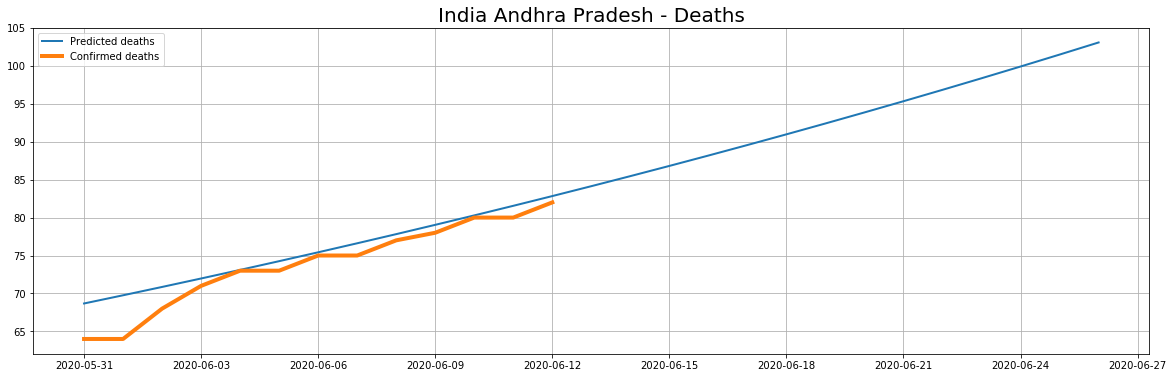

Forecast Table for Andhra Pradesh/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,74,73.0,2.0,
6,2020-06-06,75,75.0,1.0,
7,2020-06-07,77,75.0,2.0,
8,2020-06-08,78,77.0,1.0,
9,2020-06-09,79,78.0,1.0,
10,2020-06-10,80,80.0,0.0,
11,2020-06-11,82,80.0,2.0,
12,2020-06-12,83,82.0,1.0,** Actuals may be incomplete for the day **
13,2020-06-13,84,0.0,0.0,
14,2020-06-14,85,0.0,0.0,


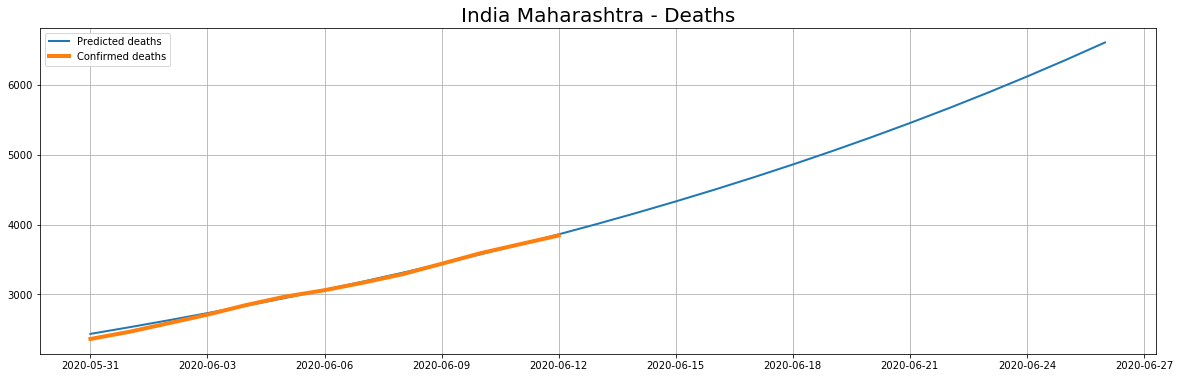

Forecast Table for Maharashtra/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,2950,"2,969.0",-1.0,
6,2020-06-06,3065,"3,060.0",0.0,
7,2020-06-07,3185,"3,169.0",1.0,
8,2020-06-08,3310,"3,289.0",1.0,
9,2020-06-09,3440,"3,438.0",0.0,
10,2020-06-10,3574,"3,590.0",-0.0,
11,2020-06-11,3714,"3,717.0",-0.0,
12,2020-06-12,3859,"3,843.0",0.0,** Actuals may be incomplete for the day **
13,2020-06-13,4010,0.0,0.0,
14,2020-06-14,4167,0.0,0.0,


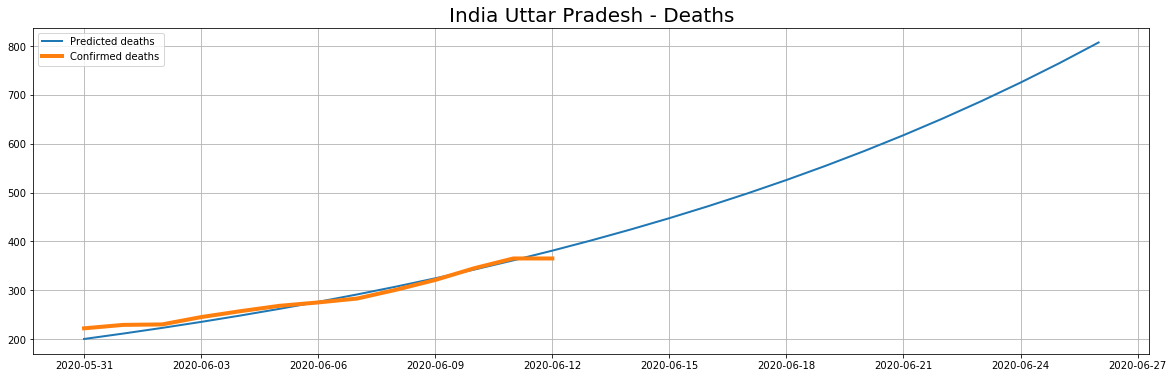

Forecast Table for Uttar Pradesh/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,262,268.0,-2.0,
6,2020-06-06,276,275.0,0.0,
7,2020-06-07,291,283.0,3.0,
8,2020-06-08,307,301.0,2.0,
9,2020-06-09,324,321.0,1.0,
10,2020-06-10,342,345.0,-1.0,
11,2020-06-11,361,365.0,-1.0,
12,2020-06-12,381,365.0,4.0,** Actuals may be incomplete for the day **
13,2020-06-13,402,0.0,0.0,
14,2020-06-14,424,0.0,0.0,


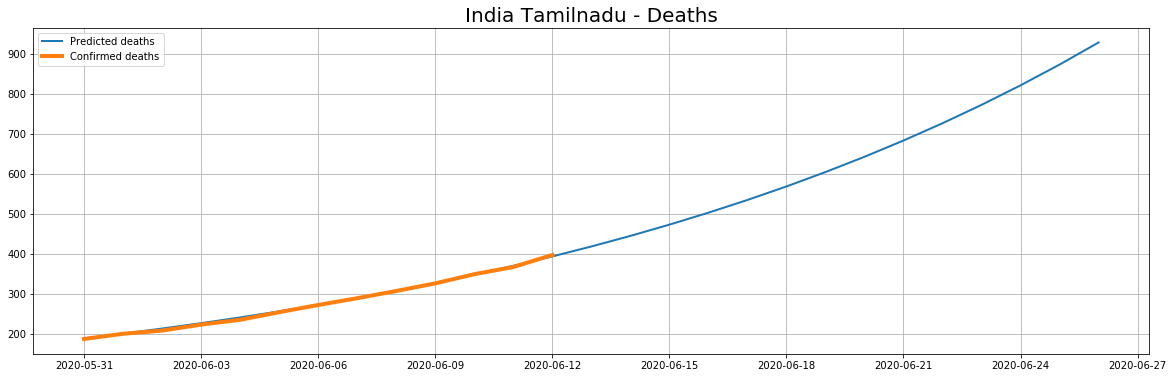

Forecast Table for Tamilnadu/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,256,254.0,1.0,
6,2020-06-06,272,272.0,0.0,
7,2020-06-07,290,289.0,0.0,
8,2020-06-08,308,307.0,0.0,
9,2020-06-09,327,326.0,0.0,
10,2020-06-10,348,349.0,-0.0,
11,2020-06-11,370,367.0,1.0,
12,2020-06-12,393,397.0,-1.0,** Actuals may be incomplete for the day **
13,2020-06-13,418,0.0,0.0,
14,2020-06-14,445,0.0,0.0,


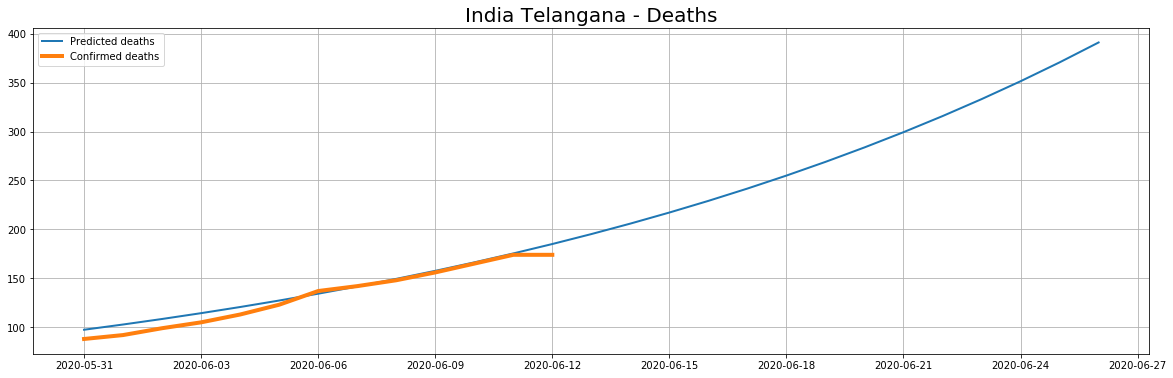

Forecast Table for Telangana/India - Total Deaths


,date,prediction,actual,error_percentage,comments
5,2020-06-05,127,123.0,3.0,
6,2020-06-06,134,137.0,-2.0,
7,2020-06-07,142,142.0,-0.0,
8,2020-06-08,149,148.0,1.0,
9,2020-06-09,158,156.0,1.0,
10,2020-06-10,166,165.0,1.0,
11,2020-06-11,175,174.0,1.0,
12,2020-06-12,185,174.0,6.0,** Actuals may be incomplete for the day **
13,2020-06-13,195,0.0,0.0,
14,2020-06-14,206,0.0,0.0,


In [19]:
import numpy as np
for state in ['TT','HR','DL','AP','MH','GA','UP','TN','TG']:# df.columns:
    
    mydata=df.loc[:,[state]].copy()
    statemap={'HR':'Haryana','DL':'Delhi','AP':'Andhra Pradesh','MH':'Maharashtra',
    'GA':'Goa','UP':'Uttar Pradesh','TN':'Tamilnadu','TG':'Telangana','BH':'Bihar', 'TT':'Total'}
    state=statemap[state]
    mydata.columns=['confirmed']
    def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
        return a * x + c
    try:
        mydata['confirmed'] = mydata.confirmed.map (lambda x: x['total']['deceased'])
        #print(mydata)
        mydata['dt']=pd.to_datetime(mydata.index)
        mydata['log_confirmed']=np.log(mydata['confirmed'].values.astype(float)+1)
        mydata['day'] = np.arange(len(mydata))+1
    except:
        continue
        x = mydata.day[-8:-1]   # changed boundary conditions to avoid division by 0
    yn = mydata.log_confirmed[-8:-1]
    #yn = y + 0.2*np.random.normal(size=len(x))
    popt, pcov = curve_fit(func, x, yn)
    gx=pd.DataFrame(pd.date_range(start='05/01/2020' , end='07/7/2020'),columns=['dt'])
    
    gx['day']=np.arange(len(gx))+1
    gx['predicted']=np.exp(func(gx.day, *popt))
    
    import datetime
    start= pd.to_datetime(pd.to_datetime("today").date()) - pd.Timedelta(14, unit='D')
    end=pd.to_datetime(pd.to_datetime("today").date()) + pd.Timedelta(14, unit='D')
    newdt=gx[ ( gx.dt > start)  & (gx.dt < end)  ]
    f=pd.merge(newdt,mydata,right_on='day',left_on='day',how='left')
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(20,6))
    plt.plot(f.dt_x,f.predicted,label='Predicted deaths',linewidth=2)
    plt.plot(f.dt_x,f.confirmed,label='Confirmed deaths',linewidth=4)
    gg=pd.DataFrame()
    gg['dt']=f.dt_x
    gg['predicted']=np.round(f.predicted).astype(int)
    gg['confirmed']=f.confirmed
    gg['error_percentage']=100*(f.predicted-f.confirmed)/f.confirmed
    gg.fillna(0,inplace=True)
    plt.grid()
    plt.legend()
    plt.title(f'India {state} - Deaths',fontsize=20)
    plt.show()
    gg['error_percentage']=np.round(gg['error_percentage'])
    gg.columns=['date', 'prediction', 'actual', 'error_percentage']
    gg['comments']=''
    gg.at[gg[gg.actual!=0].index.max(),'comments']='** Actuals may be incomplete for the day **'
    print(f'Forecast Table for {state}/India - Total Deaths')
    display(HTML(gg[5:].to_html()))
    del func
    del gx
    del gg

In [5]:
from IPython.core.display import HTML,display,Image
display(HTML('<a href="http://www.cov2response.com"> Back to cov2response.com </a>'))